## Введение
В этом проекте вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

In [1]:
# Импорт библиотек

import os
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from termcolor import colored
import seaborn as sns
from scipy import stats as st
import math as mth


# Чтобы мы могли нормально видеть наши гипотезы, установим:
pd.set_option('max_colwidth', 120)

In [2]:
# Моя собственная функция для первичного анализа загружаемых таблиц

def base_info(df):
    
   # df.columns = [col.lower().replace(' ','_').replace('-','_') for col in df.columns]
   # В этот раз не буду автоматически переименовывать столбцы
    
    print(colored("Общая информация о таблице:", "blue", attrs=['bold']))
    print()
    print(df.info())
    print()
    print(colored("Циферки:", "blue", attrs=['bold']))
    display(df.describe().T)
    print()
    print(colored("Количество явных дубликатов: ", "blue", attrs=['bold']), df.duplicated().sum())
    print()
    print(colored("Первые строки таблицы:", "blue", attrs=['bold']))
    display(df.head(10))
    print(colored("Доли отсутствующих значений", "blue", attrs=['bold']))
    print(round(df.isna().mean() * 100, 2))

In [3]:
# если работаем на ЯП
pth11 = '/datasets/hypothesis.csv' 
pth12 = '/datasets/orders.csv' 
pth13 = '/datasets/visitors.csv' 

# если работаем локально
pth21 = 'hypothesis.csv' 
pth22 = 'orders.csv' 
pth23 = 'visitors.csv'


if os.path.exists(pth11):
    hypothesis = pd.read_csv(pth11)
    orders = pd.read_csv(pth12)
    visitors = pd.read_csv(pth13)
    
elif os.path.exists(pth21):
    hypothesis = pd.read_csv(pth21)
    orders = pd.read_csv(pth22)
    visitors = pd.read_csv(pth23)
else:
    print('Что-то поломалось :(')  

## Часть 1. Приоритезация гипотез

Посмотрим, что у нас в таблице с гипотезами:

In [4]:
base_info(hypothesis)

Общая информация о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None

Циферки:


,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Efforts,9.0,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0



Количество явных дубликатов:  0

Первые строки таблицы:


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Доли отсутствующих значений
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64


### Фреймворк ICE

$$ICE = \frac{Impact * Confidence}{Efforts}$$

Применим фреймворк ICE для приоритизации гипотез. 
Отсортируем их по убыванию приоритета.

In [5]:
hypothesis['ICE'] = round((hypothesis.Impact * hypothesis.Confidence) / hypothesis.Efforts, 1)

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


Итак видим первые результаты: максимальный приоритет - акция ко дню рождения, и действительно она сильно повлияет на пользователей и наша уверенность в ней практически максимальная. Далее идёт идея добавления двух новых каналов привлечения и добавление формы подписки на все основные страницы.

### Фреймворк RICE

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$

Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
hypothesis['RICE'] = (hypothesis.Reach * hypothesis.Impact * hypothesis.Confidence) / hypothesis.Efforts

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


А вот тут уже картина меняется, ведь теперь мы учитываем скольких пользователей затронет изменение, которое мы хотим внести.
И конечно вырывается вперед гипотеза с добавлением формы подписки, ведь она охватывает максимальное количество пользователей, далее идёт идея о добавлении рекомендаций, и хотя влияние её на пользователей ниже, зато охват и уверенность высокие при низких затратах на проверку.

Отдельно стоит сказать о "крепком середнячке" - гипотезе о показе баннеров на главной странице, в обоих фреймворках занимает 4 место.

In [7]:
display(hypothesis[['Hypothesis', 'ICE', 'RICE']]
        .sort_values(by='RICE', ascending=False)
        .style.background_gradient(cmap='Blues')) 

,Hypothesis,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.000000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.300000,40.000000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.000000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.200000
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.100000,9.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.300000,4.000000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.000000


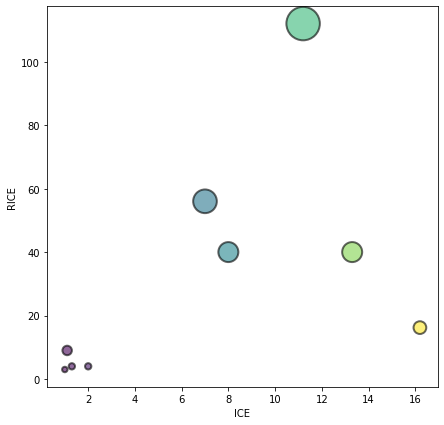

In [8]:
# Строю диаграмму рассеяния для гипотез

hyp = hypothesis[['Hypothesis', 'ICE', 'RICE']]
fig, ax = plt.subplots()

ax.scatter(hyp['ICE'], hyp['RICE'],
           marker = 'o',
           c = hyp['ICE'],
           s = 10*hyp['RICE'],
           linewidths = 2,
           edgecolors = 'black',
           alpha = 0.6)

fig.set_figwidth(7)    
fig.set_figheight(7)
plt.xlabel("ICE")
plt.ylabel("RICE")
plt.show();

## Часть 2. Анализ A/B-теста

Приведём формат даты

In [9]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

display(orders.head(5))
display(visitors.head(5))


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


### Проверка разделения
Как говорит нам теория, перед проведением А/В-теста нужно убедится в качественном разделении пользователей по группам, ведь иначе результаты будут неверны

In [10]:
# Проверка пользователей, попавших в обе группы:
group_count = orders.groupby('visitorId')['group'].nunique()
bad_users = group_count[group_count > 1].index
print('Число пользователей сразу в 2 группах:', len(bad_users))

Число пользователей сразу в 2 группах: 58


После такого результата я почти запаниковал.. как убрать влияние этих пользователей на всю нашу конструкцию? Сложно..

Затем пришла мысль, что таких пользователей очень мало, возможно тестировщики и т.д. Пусть остаются

In [11]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                      .agg({'date' : 'max', 
                            'group' : 'max', 
                            'transactionId' : 'nunique', 
                            'visitorId' : 'nunique', 
                            'revenue' : 'sum'}), axis=1)\
    .sort_values(by=['date','group'])
)

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
)

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head()) 

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам 

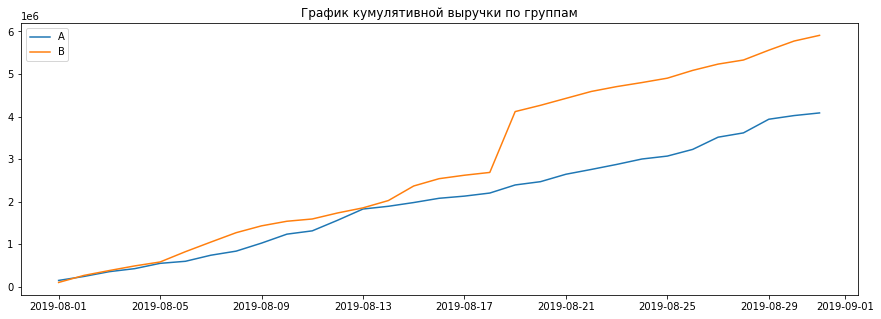

In [12]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(15, 5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')

plt.legend();

Видим, что выручка растёт, это хорошо. Так же у группы В есть резкий скачок, подозреваю выброс.

### График кумулятивного среднего чека по группам
Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

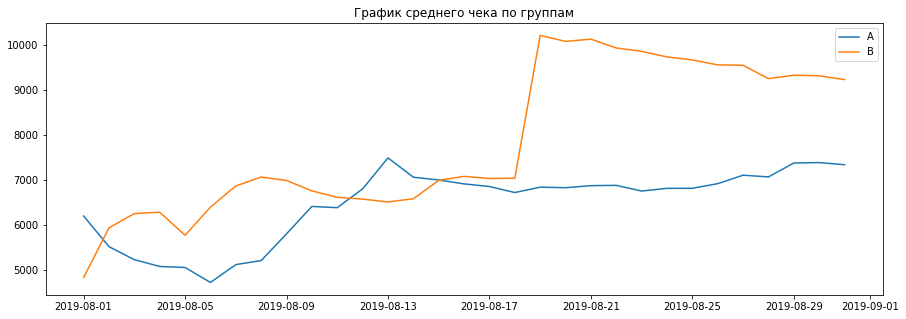

In [13]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека по группам')
plt.legend(); 

Средний чек становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного различия для среднего чека

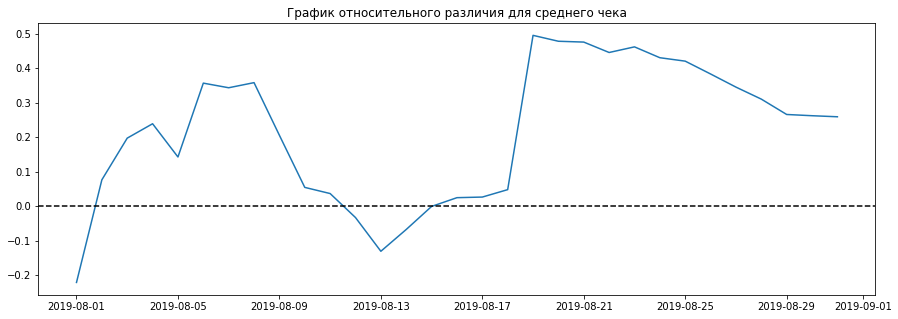

In [14]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', 
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(
             mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного различия для среднего чека');

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы.

### График кумулятивной конверсии по группам
Аналогично проанализируем график кумулятивной конверсии

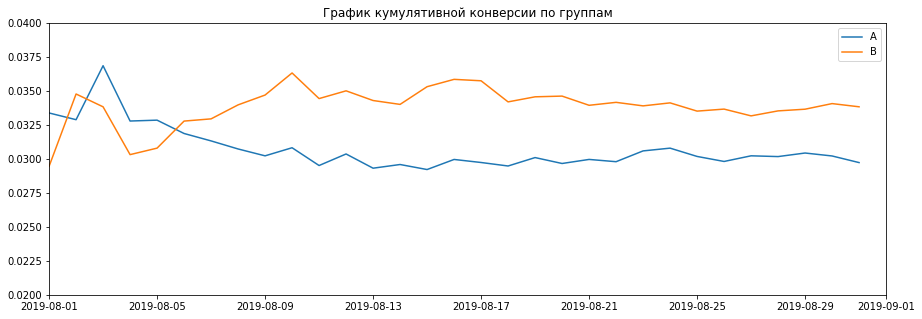

In [15]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

plt.title('График кумулятивной конверсии по группам')

plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.02, 0.04]);

Сегмент В вырос относительно А и зафиксировался, колебание было небольшим от 3% до 4%

### График относительного изменения кумулятивной конверсии группы B к группе A

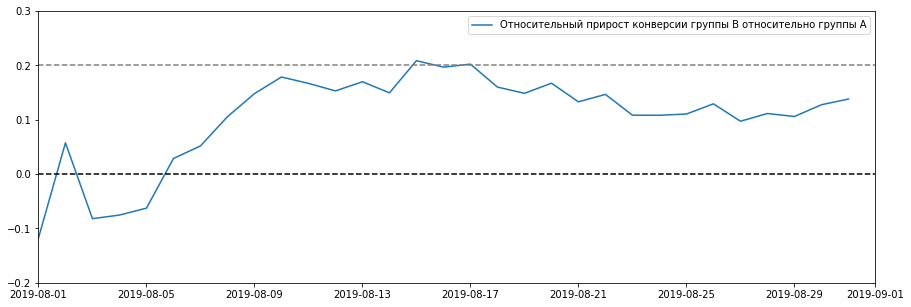

In [16]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']]\
.merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.2, 0.3]);

Почти с начала группа В вырвалась вперёд .В какой-то момент конверсия группы В была больше 20% относительно А, затем начала спадать и выравниваться.

### Количество заказов по пользователям

Подсчитаем количество заказов по пользователям

In [17]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['visitorId', 'orders']
ordersByUsers

,visitorId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


Теперь можем построить точечный график количества заказов по пользователям:

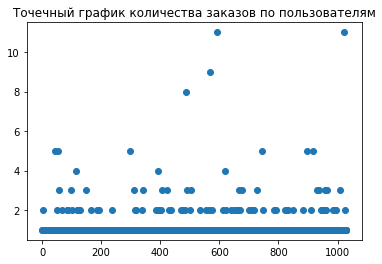

In [18]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям'); 

Теперь посчитаем 95-й и 99-й перцентили количества заказов на пользователя:

In [19]:
display(np.percentile(ordersByUsers['orders'], [95, 99]))

array([2., 4.])

Есть у нас уникумы - "любимые клиенты" с заказами больше 10, но их аж двое :) Но не больше 5% пользователей сделали больше 2х заказов и не более 1% - больше 4.

Можем выбрать границу для определения аномальных пользователей - более 2х заказов.

### Cтоимость заказов

Построим точечный график стоимости заказов

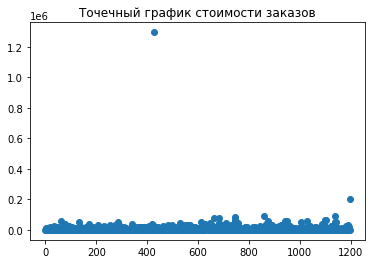

In [20]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимости заказов');

Теперь посчитаем 95-й и 99-й перцентили стоимости заказов:

In [21]:
display(np.percentile(orders['revenue'], [95, 99]))

array([28000. , 58233.2])

Итак, не больше 5% заказов дороже 28 000 и не более 1% - дороже 58233.

Границей аномальных заказов можно принять 28 000

### Cтатистическая значимость различий в конверсии между группами по «сырым» данным

Посчитаем статистическую значимость различий в конверсии и среднем чеке между группами по «сырым» данным.

Сформулируем гипотезы. Нулевая: различий в конверсии между группами нет. Альтернативная: различия в конверсии между группами есть.

Для их проверки будем использовать критерий Манна-Уитни, а статистическую значимость установим на уровне 5% (0,05)

Начнём с подготовки данных. 

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              24           148579              21   
1 2019-08-02              20            93822              24   
2 2019-08-03              24           112473              16   
3 2019-08-04              16            70825              17   
4 2019-08-05              25           124218              23   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0           101217                  24               148579   
1           165531                  44               242401   
2           114248                  68               354874   
3           108571                  84               425699   
4            92428                 109               549917   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  21               101217               719   
1                  45               266748               619   
2                  61               38

Воспользуемся критерием Манна-Уитни:

In [23]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('p-value:', "{0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print(f"Относительно изменение конверсии: {sampleB.mean() / sampleA.mean() - 1:.1%}")

p-value: 0.017
Относительно изменение конверсии: 13.8%


Полученное значение p-value меньше 0.05 говорит нам о том, что статистически значимые различия в конверсии между группами есть.

А относительный выигрыш группы B равен 13.8%

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [25]:
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                                   orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.729
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Примем за аномальных пользователей тех, кто совершил от 3 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1% до 5% пользователей с дорогими заказами.

Узнаем, сколько всего аномальных пользователей.

In [26]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print('Количество аномальных пользователей:', abnormalUsers.shape) 

Количество аномальных пользователей: (74,)


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [27]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [28]:
print('p-value:', '{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

print(f"Относительно изменение конверсии: {sampleBFiltered.mean()/sampleAFiltered.mean()-1:.1%}")

p-value: 0.013
Относительно изменение конверсии: 17.3%


Результаты по конверсии практически не изменились. Произошло ли что-нибудь с результатами по среднему чеку?

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [29]:
print(
    'p-value:', '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    'Относительно изменение конверсии: ',"{0:.1%}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value: 0.738
Относительно изменение конверсии:  -2.0%


P-value значительно больше 0.05, ещё и увеличился. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. А вот средний чек группы B вдруг стал почти равен среднему чеку группы A.

## Вывод

В этой работе мы 
- провели приоретизацию гипотез двумя методами;
- использовали результаты А/В, проверили правильность разделения пользователей;
- построили графики:
        - кумулятивной выручки по группам
        - кумулятивного среднего чека по группам
        - относительного изменения кумулятивного среднего чека
        - кумулятивной конверсии по группам
        - относительного изменения кумулятивной конверсии
        - количества заказов по пользователям
        - стоимости заказов
- сформулировали гипотезы и проверили их с помощью критерия Манна-Уитни


Пришла пора принять решение по результатам теста. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Как джун могу только порекомендовать остановить тест, признать его успешным, зафиксировав победу группы В. Так как хоть и очищенные данные по среднему чеку сравнялись с группой А, но выросла конверсия, а значит и количество самих заказов.